### Get Active Validators Overall Data From Dune Query Result And Create Dataframe

[Dune Query](https://dune.com/queries/5925380/9566572)

In [4]:
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from dune_client.types import QueryParameter
from dune_client.client import DuneClient
from dune_client.query import QueryBase

load_dotenv(dotenv_path=".env")
dune_api_key = os.getenv("DUNE_API")

dune = DuneClient(api_key=dune_api_key)
query = QueryBase(query_id=5925380) # Active Validators

# Refresh the query to get the latest results
dune.refresh(query)
query_result = dune.get_latest_result(5925380)

# Convert result rows to DataFrame
df_dune_overall = pd.DataFrame(query_result.get_rows())

print(df_dune_overall.head())





C:\Users\tobec\AppData\Local\Temp\ipykernel_17464\3378159946.py:19: DeprecationWarning: Call to deprecated method refresh. (Please use run_query) -- Deprecated since version 1.2.1.
  dune.refresh(query)
2025-10-08 14:20:49,965 INFO dune_client.api.base executing 5925380 on medium cluster
2025-10-08 14:20:51,967 INFO dune_client.api.base waiting for query execution 01K71ZPMZJDGTD34438HP7FMXC to complete: ExecutionState.PENDING (queue position: None)
2025-10-08 14:20:53,166 INFO dune_client.api.base waiting for query execution 01K71ZPMZJDGTD34438HP7FMXC to complete: ExecutionState.PENDING (queue position: None)
2025-10-08 14:20:54,357 INFO dune_client.api.base waiting for query execution 01K71ZPMZJDGTD34438HP7FMXC to complete: ExecutionState.EXECUTING
2025-10-08 14:20:55,542 INFO dune_client.api.base waiting for query execution 01K71ZPMZJDGTD34438HP7FMXC to complete: ExecutionState.EXECUTING
2025-10-08 14:20:56,880 INFO dune_client.api.base waiting for query execution 01K71ZPMZJDGTD34438

   commission  perc_share  plume_staked  stakers           validator
0         0.5   54.620894  3.856641e+07    57868    Plume Foundation
1         0.5   14.219559  1.004007e+07    19067            Republic
2         0.5    8.813845  6.223230e+06    17966  Korea Web3 Embassy
3         0.5    8.394292  5.926995e+06    25801          Bioeconomy
4         0.5    4.368655  3.084595e+06    18020        SBI_DeFimans


### Get Daily Active Validators Data From Dune Query Result And Create Dataframe

[Dune Query](https://dune.com/queries/5927491) 

In [10]:
load_dotenv(dotenv_path=".env")
dune_api_key = os.getenv("DUNE_API")

dune = DuneClient(api_key=dune_api_key)
query = QueryBase(query_id=5927491) # Active Validators

# Refresh the query to get the latest results
dune.refresh(query)
query_result = dune.get_latest_result(5927491)

# Convert result rows to DataFrame
df_dune_daily = pd.DataFrame(query_result.get_rows())

print(df_dune_daily.head())

C:\Users\tobec\AppData\Local\Temp\ipykernel_17464\2456546268.py:8: DeprecationWarning: Call to deprecated method refresh. (Please use run_query) -- Deprecated since version 1.2.1.
  dune.refresh(query)
2025-10-08 14:31:03,212 INFO dune_client.api.base executing 5927491 on medium cluster
2025-10-08 14:31:05,330 INFO dune_client.api.base waiting for query execution 01K7209C00T0T070QVTG2CE6X4 to complete: ExecutionState.PENDING (queue position: None)
2025-10-08 14:31:06,571 INFO dune_client.api.base waiting for query execution 01K7209C00T0T070QVTG2CE6X4 to complete: ExecutionState.EXECUTING
2025-10-08 14:31:08,001 INFO dune_client.api.base waiting for query execution 01K7209C00T0T070QVTG2CE6X4 to complete: ExecutionState.EXECUTING
2025-10-08 14:31:09,317 INFO dune_client.api.base waiting for query execution 01K7209C00T0T070QVTG2CE6X4 to complete: ExecutionState.EXECUTING
2025-10-08 14:31:10,769 INFO dune_client.api.base waiting for query execution 01K7209C00T0T070QVTG2CE6X4 to complete: E

   amount_staked  amount_staked_growth_24h  amount_staked_growth_30D  \
0   1.004007e+07                  0.045521                295.606817   
1   1.862927e+06                  0.022562                  4.885426   
2   3.084596e+06                  0.022986                  0.270516   
3   3.856643e+07                  0.315487                  9.995387   
4   1.150570e+06                 -0.157500                -19.891392   

   amount_staked_growth_7D        date  stakers  stakers_growth_24h  \
0                 0.258060  2025-10-08    19069            0.099738   
1                 0.872996  2025-10-08    19083            0.000000   
2                 0.487628  2025-10-08    18027            0.022194   
3                 5.916704  2025-10-08    57882            0.051856   
4               -21.386456  2025-10-08    18197           -0.016484   

   stakers_growth_30D  stakers_growth_7D         validator  
0            7.558238           0.278713          Republic  
1            7.746

### Use Joblib To Store Data

In [11]:
import joblib
import os 

save_path = r"C:\Users\tobec\OneDrive\Documents\plume_validators\database"
os.makedirs(save_path, exist_ok=True)

joblib.dump(df_dune_overall, os.path.join(save_path, "df_dune_overall.joblib"))
joblib.dump(df_dune_daily, os.path.join(save_path, "df_dune_daily.joblib"))



['C:\\Users\\tobec\\OneDrive\\Documents\\plume_validators\\database\\df_dune_daily.joblib']

### Load Joblib



In [30]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
save_path = "C:\\Users\\tobec\\OneDrive\\Documents\\plume_validators\\database\\df_dune_overall.joblib"
df_dune_overall_loaded = joblib.load(save_path)
print(df_dune_overall_loaded)

   commission  perc_share  plume_staked  stakers           validator
0         0.5   54.620894  3.856641e+07    57868    Plume Foundation
1         0.5   14.219559  1.004007e+07    19067            Republic
2         0.5    8.813845  6.223230e+06    17966  Korea Web3 Embassy
3         0.5    8.394292  5.926995e+06    25801          Bioeconomy
4         0.5    4.368655  3.084595e+06    18020        SBI_DeFimans
5         0.5    2.638426  1.862925e+06    19078           Nano Labs
6         0.5    1.821754  1.286294e+06    17787     CoinSummer labs
7         0.5    1.798073  1.269573e+06    18199                DSRV
8         0.5    1.694973  1.196777e+06    17912             PNP MAX
9         0.5    1.629529  1.150569e+06    18194          Hello Moon


In [52]:
import pandas as pd
import numpy as np
# get perc between 10 and 60

print(df_dune_overall_loaded[np.logical_and(df_dune_overall_loaded['perc_share'] >= 10, df_dune_overall_loaded['perc_share'] <= 60)])


   commission  perc_share  plume_staked  stakers         validator
0         0.5   54.620894  3.856641e+07    57868  Plume Foundation
1         0.5   14.219559  1.004007e+07    19067          Republic


### Create A Pie Chart Showing Validators With Plume Staked

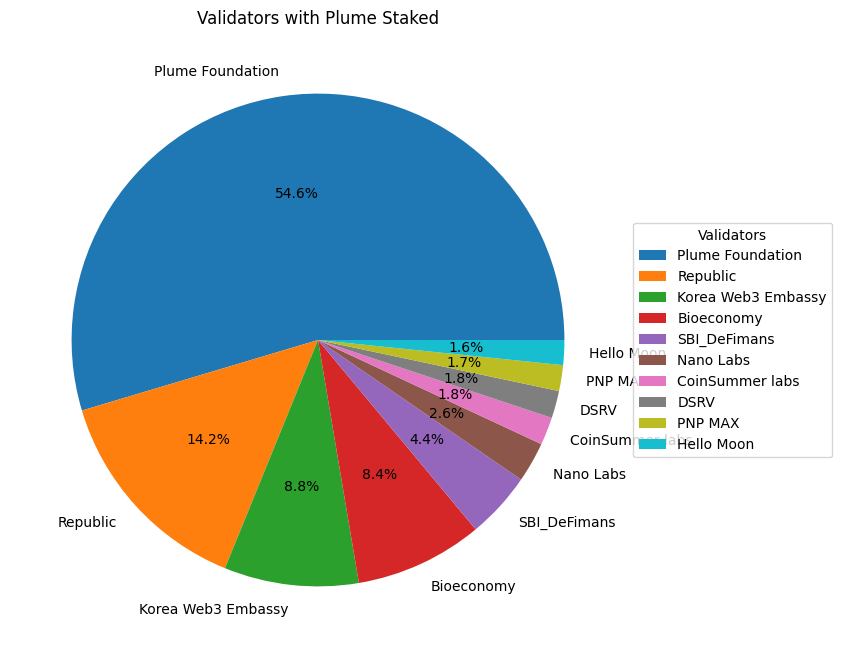

In [60]:
import matplotlib.pyplot as plt
### Create A Pie Chart Showing Validators With Plume Staked

plt.figure(figsize=(8, 8))
# Data to plot
wedges, texts, autotexts = plt.pie(
    df_dune_overall_loaded['plume_staked'],
    labels=df_dune_overall_loaded['validator'],
    autopct='%1.1f%%'
)
plt.title('Validators with Plume Staked')
plt.legend(wedges, df_dune_overall_loaded['validator'], title="Validators", bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()